In [3]:
# Set global parameters
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

# Make sure the path is correct
TRAIN_PATH = '/home/song/Documents/Courses/CS342: Machine Learning/Assignment2/input/stage1_train/'
TEST_PATH = '/home/song/Documents/Courses/CS342: Machine Learning/Assignment2/input/stage1_test/'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
#seed = 99
#random.seed = seed
#np.random.seed = seed

In [4]:
# Get train and test IDs and put them into a list
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [5]:
# Create dataframe with IDs
stage1_train = pd.DataFrame({'ImageId': train_ids})
stage1_test = pd.DataFrame({'ImageId': test_ids})

print('stage1_train: {}'.format(type(stage1_train)))
print('stage1_test: {}'.format(type(stage1_test)))

stage1_train: <class 'pandas.core.frame.DataFrame'>
stage1_test: <class 'pandas.core.frame.DataFrame'>


In [6]:
# Getting all images and cropping them
# Stored in list objects
%run -i './code/get_images.py' 
%run -i './code/crop.py' 

Getting train images and masks


100%|██████████| 670/670 [00:39<00:00, 16.80it/s]

Getting test images



100%|██████████| 65/65 [00:00<00:00, 149.06it/s]

X_train: <class 'list'> and length: 670
Y_train: <class 'list'> and length: 670
X_test: <class 'list'> and length: 65
X_cropped: <class 'list'> and shape: (744,)
Y_cropped: <class 'list'> and shape: (744,)


In [7]:
# Creating list objects X_total, Y_total which contain all images and cropped images
X_total = X_train + X_cropped
Y_total = Y_train + Y_cropped

In [8]:
# Dataframes stage1_train and stage1_test are are filled up with information
%run -i './code/dataframe_images.py' 

stage1_train: BW:1, Colour:0
+--------+------------+
| values |   [1, 0]   |
+--------+------------+
| counts | [562, 108] |
+--------+------------+
stage1_train: class: colour=0, BW=1, BW/light=2
+--------+----------------+
| values |   [1, 0, 2]    |
+--------+----------------+
| counts | [546, 108, 16] |
+--------+----------------+
stage1_train has images with dimension:
+-----------------+--------+
|      values     | counts |
+-----------------+--------+
|  (256, 256, 3)  |  334   |
|  (256, 320, 3)  |  112   |
|  (520, 696, 3)  |   92   |
|  (360, 360, 3)  |   91   |
| (1024, 1024, 3) |   16   |
|  (512, 640, 3)  |   13   |
|  (603, 1272, 3) |   6    |
|  (260, 347, 3)  |   5    |
| (1040, 1388, 3) |   1    |
+-----------------+--------+
stage1_test: BW:1, Colour:0
+--------+----------+
| values |  [1, 0]  |
+--------+----------+
| counts | [53, 12] |
+--------+----------+
stage1_test: class: colour=0, BW=1, BW/light=2
+--------+----------+
| values |  [1, 0]  |
+--------+-------

In [ ]:
#stage1_train.to_csv('./output/stage1_train.csv')
#stage1_test.to_csv('./output/stage1_test.csv')

In [ ]:
#stage1_train = read_csv('./output/stage1_train.csv')
#stage1_test  = read_csv('./output/stage1_test.csv')

## Resizing and Data Augmenting the images

In [9]:
# creates a list called X_total_resized where all images in X_total are stored as image objects
# each image object has multiple augmented images stored in the object

X_total_resized = []
for i in range(len(X_total)):
    X_temp = ImageResized(X_total[i], IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    X_temp.img_augmentated()  
    X_temp.Otsu_HoG_overlay(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
    X_temp.watershed_overlay(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
    X_temp.threshold_mask(cv2.ADAPTIVE_THRESH_GAUSSIAN_C+cv2.THRESH_OTSU) 
    X_total_resized.append(X_temp)

In [10]:
# creates a list called Y_total_resized where all images in X_total are stored as image objects
# each image object has multiple augmented images stored in the object

Y_total_resized = []
for i in range(len(Y_total)):
    Y_temp = ImageResized(Y_total[i], IMG_HEIGHT, IMG_WIDTH, 1)
    Y_temp.img_augmentated()  
    Y_total_resized.append(Y_temp)

In [11]:
# calls the images within the objects and stores it in X_train_resized

X_train_resized = np.zeros((670, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
for k in range(670):    
    X_train_resized[k] = X_total_resized[k].img

In [12]:
# calls the images within the objects and stores it in Y_train_resized

Y_train_resized = np.zeros((670, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
for k in range(670):    
    Y_train_resized[k] = Y_total_resized[k].img

In [13]:
# creates a list called X_test_resized_obj where all images in X_test are stored as image objects
# each image object has multiple augmented images stored in the object

X_test_resized_obj  = []
for i in range(len(X_test)):
    image_temp = ImageResized(X_test[i], IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    X_test_resized_obj.append(image_temp) 


# calls the images within the objects and stores it in X_test_resized

X_test_resized = np.zeros((65, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
for k in range(65):    
    X_test_resized[k] = X_test_resized_obj[k].img

In [14]:
# Putting together all images and augmented images which will be fed into the CNN

X_final = np.zeros((len(X_total_resized)*9, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_final = np.zeros((len(Y_total_resized)*9, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

count = 0
for k in range(len(X_total_resized)):    
    X_final[count] = X_total_resized[k].img
    Y_final[count] = Y_total_resized[k].img
    count += 1
    X_final[count] = X_total_resized[k].img_rotated_90
    Y_final[count] = Y_total_resized[k].img_rotated_90
    count += 1
    X_final[count] = X_total_resized[k].img_rotated_180
    Y_final[count] = Y_total_resized[k].img_rotated_180
    count += 1
    X_final[count] = X_total_resized[k].img_rotated_270
    Y_final[count] = Y_total_resized[k].img_rotated_270
    count += 1
    X_final[count] = X_total_resized[k].img_flipped_lr
    Y_final[count] = Y_total_resized[k].img_flipped_lr
    count += 1
    X_final[count] = X_total_resized[k].img_flipped_ud
    Y_final[count] = Y_total_resized[k].img_flipped_ud
    count += 1
    X_final[count] = X_total_resized[k].img_Gaussian_noise
    Y_final[count] = Y_total_resized[k].img
    count += 1
    X_final[count] = X_total_resized[k].Otsu_HoG_overlay
    Y_final[count] = Y_total_resized[k].img
    count += 1
    X_final[count] = X_total_resized[k].watershed_overlay
    Y_final[count] = Y_total_resized[k].img
    count += 1

In [ ]:
# Checking whether all images look ok
# images in X_total_resized

k = 4
images = [X_total_resized[k].img,
          X_total_resized[k].img_rotated_90,
          X_total_resized[k].img_rotated_180,
          X_total_resized[k].img_rotated_270,
          X_total_resized[k].img_flipped_lr,
          X_total_resized[k].img_flipped_ud,
          X_total_resized[k].img_Gaussian_noise,
          X_total_resized[k].Otsu_HoG_overlay,
          X_total_resized[k].watershed_overlay,
          X_total_resized[k].threshold_mask]
show_multi_img(images, 2, 5, 4, 20)

In [ ]:
# Checking whether all images look ok
# images in X_final

k = 4
images = [X_final[0 + 9 * k],
          X_final[1 + 9 * k],
          X_final[2 + 9 * k],
          X_final[3 + 9 * k],
          X_final[4 + 9 * k],
          X_final[5 + 9 * k],
          X_final[6 + 9 * k],
          X_final[7 + 9 * k],
          X_final[8 + 9 * k]]
          
show_multi_img(images, 2, 5, 4, 20)

In [ ]:
# Checking whether all images look ok
# images in Y_final

k = 1
images = [Y_final[0 + 9 * k],
          Y_final[1 + 9 * k],
          Y_final[2 + 9 * k],
          Y_final[3 + 9 * k],
          Y_final[4 + 9 * k],
          Y_final[5 + 9 * k],
          Y_final[6 + 9 * k],
          Y_final[7 + 9 * k],
          Y_final[8 + 9 * k]]
          
show_multi_img(np.squeeze(images), 2, 5, 4, 20)

In [ ]:
# Last check how many images will be fed into the CNN
print(np.shape(X_final))
print(np.shape(Y_final))

In [ ]:
# Displaying all train images
show_multi_img(X_train_resized, 67, 10, 200, 20)

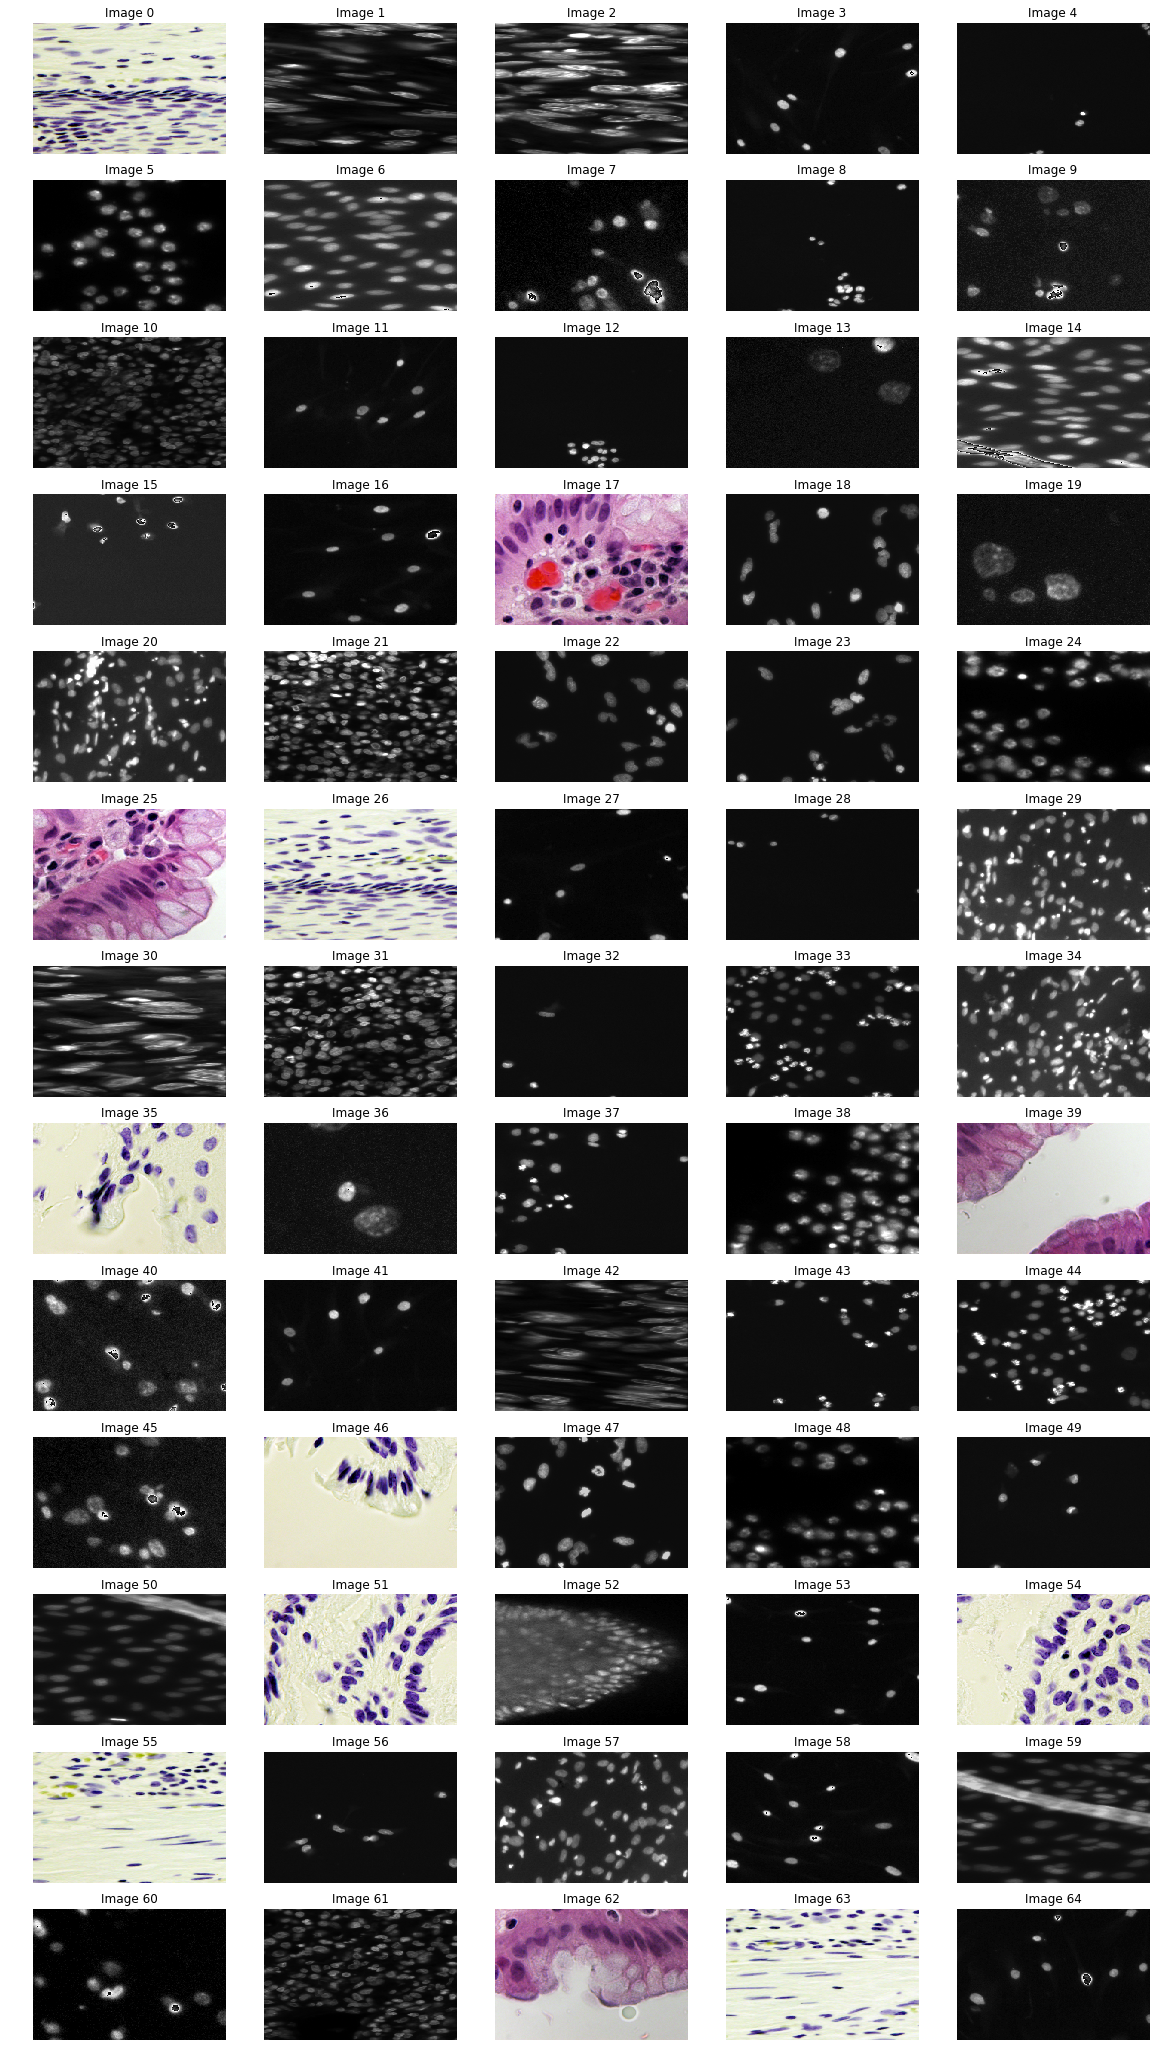

In [19]:
# Displaying all test images
show_multi_img(X_test_resized, 14, 5, 40, 20)

## CNN Model

In [ ]:
# Define the CNN model: U-net

K.clear_session()
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x ) (inputs)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='tanh') (c9)

model_UNet = Model(inputs=[inputs], outputs=[outputs])
model_UNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=[my_iou_metric])

In [ ]:
model = model_UNet
model.summary()

In [ ]:
# -----------------------------------------------------------------------------
#results = model.fit(X_final, Y_final, validation_split=0.0, batch_size=8, epochs=1)
# -----------------------------------------------------------------------------

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("./output/model.json", "w") as json_file:
    json_file.write(model_json)
    # serialize weights to HDF5
    model.save("./output/model.h5")
print("Saved model to disk. Files called: model.h5 and model.json")

In [23]:
# Prediction
#preds_train = model.predict(X_train_resized[:], verbose=1)
preds_test  = model.predict(X_test_resized[:], verbose=1)

# Threshold predictions
#preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_test_t  = (preds_test  > 0.5).astype(np.uint8)

# Calculate IoU of all train images
#score = []
#for ix in range(len(preds_train)):
#    score.append(iou_metric(np.squeeze(Y_train_resized[ix]), np.squeeze(preds_train_t[ix]), print_table=False))
#print('IoU Score: {}'.format(np.mean(score)))

65/65 [==============================] - 3s 49ms/step


In [ ]:
stage1_train['IoU UNet'] = score

In [25]:
# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test_t)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test_t[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

# Generating .csv file    
new_test_ids = []
rles = []
for n, id_ in enumerate(test_ids):
    rle = list(prob_to_rles(preds_test_upsampled[n]))
    rles.extend(rle)
    new_test_ids.extend([id_] * len(rle))

sub = pd.DataFrame()
sub['ImageId'] = new_test_ids
sub['EncodedPixels'] = pd.Series(rles).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('./output/pred_test.csv', index=False)

In [21]:
# load json and create model
json_file = open('./output/20180329_model_UNet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./output/20180329_model_UNet.h5")
loaded_model.compile('sgd','mse')

print("Loaded model from disk")

model = loaded_model

Loaded model from disk


# Analysis

In [ ]:
# Prediction CNN
preds_train = model.predict(X_train_resized[:], verbose=1)
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)

In [ ]:
score = []
for ix in range(len(preds_train)):
    score.append(iou_metric(np.squeeze(Y_train_resized[ix]), np.squeeze(preds_train_t[ix]), print_table=False))
print('Score: {}'.format(np.mean(score)))
stage1_train['score'] = score

In [ ]:
IoU = stage1_train['score'][stage1_train['score'] < 0.35].index.tolist()

In [ ]:
X_image_score_bad = []
Y_image_score_bad = []
Y_pred_score_bad = []
score_bad = []
for i in IoU:
    X_image_score_bad.append(X_train_resized[i])
    Y_pred_score_bad.append(preds_train_t[i])
    Y_image_score_bad.append(Y_train_resized[i])
    score_bad.append(score[i])

In [ ]:
images = []
for i in range(len(X_image_score_bad)):
    images.append(X_image_score_bad[i])
    images.append(np.squeeze(Y_image_score_bad[i]))
    images.append(np.squeeze(Y_pred_score_bad[i]))

m = 200
n = 6
height = 600
width = 20

plt.figure(figsize=(width, height))
for i in range(len(images)):
    plt.subplot(m,n,i+1)
    plt.imshow(images[i], aspect='auto')
    plt.axis('off')
    #plt.title('Image {}, Score {}'.format(count, score_bad[count]))
plt.show()

# Overlapping objects separation method

https://www.kaggle.com/bostjanm/overlapping-objects-separation-method

In [ ]:
%run -i './code/Overlapping_objects_separation_method.py'

In [ ]:
preds_test_t_separated = np.zeros((65, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)

for j in range(65):
    mask = np.squeeze(preds_test_t[j])
    labels = label(mask, neighbors=4)

    reconstructedMask = np.zeros(mask.shape, dtype=np.bool)
    for i in range(1, labels.max() + 1):
        # separate objects
        img_ = separation(labels == i)
        # copy to reconstructed mask
        reconstructedMask = reconstructedMask + img_

    labelsFinal = label(reconstructedMask, neighbors=4)
    labelsFinal = labelsFinal.reshape(labelsFinal.shape + (1,))
    a = (labelsFinal > 0.5)
    preds_test_t_separated[j] = a

In [ ]:
preds_test_t = preds_test_t_separated